## Hypothesis Testing

there are 3 ways to go through hypothesis testing
    1. Boot strapping the sample mean and capture the candidate parameter with certain confidence interval.
    2. Simulating from the NULL hypothesis.
    3. traditional testing methods. using test statistics.

In [23]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
from sklearn import datasets

## Method 1
By using confidence interval to capture area for the candidate parameters using sampling distribution of a statistic.

In [24]:
iris = datasets.load_iris()

In [25]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [28]:
df[:5]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [36]:
df_sample = df.sample(n=100)

In [38]:
boot_means = []
for _ in range(10000):
    boot_sample = df_sample.sample(n=100, replace=True)
    boot_means.append(boot_sample['sepal length (cm)'].mean())
    

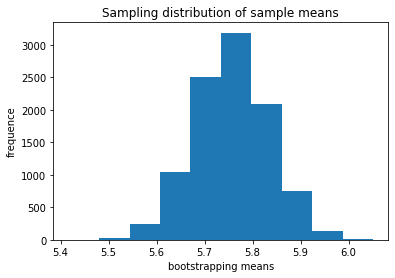

In [62]:
plt.hist(boot_means)
plt.title('Sampling distribution of sample means')
plt.xlabel('bootstrapping means')
plt.ylabel('frequence')
plt.show()

In [42]:
low, upper = np.percentile(boot_means, 2.5), np.percentile(boot_means, 97.5)

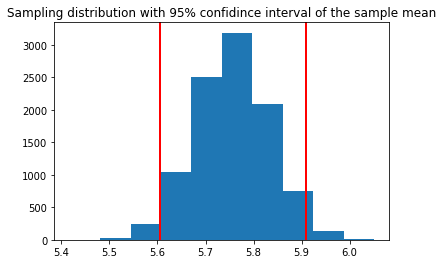

In [63]:
plt.title('Sampling distribution with 95% confidince interval of the sample mean')
plt.hist(boot_means)
plt.axvline(low, color='r', lw=2)
plt.axvline(upper, color='r', lw=2)
plt.show()

In [93]:
sample_mean = df_sample['sepal length (cm)'].mean()
sample_std = df_sample['sepal length (cm)'].std()

print('sample mean= {}, sample STD= {:.3}'.format(sample_mean, sample_std))

sample mean= 5.756, sample STD= 0.784


In [64]:
df['sepal length (cm)'].mean()

5.843333333333334

## Method 2
By simulate the sampling distribution from the null hupothesis and use the observed statistic from the data or the p-value to decide.

$$H0:\mu = 8$$

$$H1:\mu \neq 8$$

In [119]:
# simulate the sampling from H0

s = np.std(boot_means)

# the sampling distribution of sample means drawn from the null hypothesis space
simulated_sampling = np.random.normal(8, s, 10000)

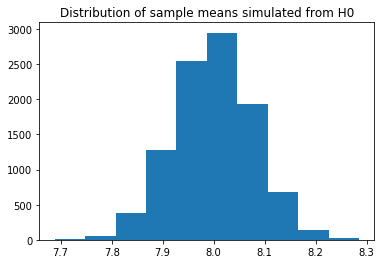

In [126]:
plt.title('Distribution of sample means simulated from H0')
plt.hist(simulated_sampling)
plt.show()

The value of sample mean is really far away from the simulated distribution drawn from the H0 that suggests to reject H0.

## Calculate p-value

In [130]:
null_mean = 8
p_value = (simulated_sampling < sample_mean).mean() + (simulated_sampling >  null_mean +(null_mean - sample_mean)).mean()
print(f'p_value= {p_value}')

p_value= 0.0


That suggest to reject **H0**

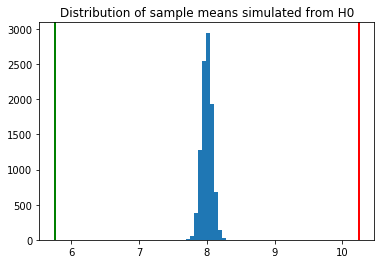

In [131]:
plt.title('Distribution of sample means simulated from H0')
plt.hist(simulated_sampling)
plt.axvline(x=sample_mean, color='g', lw=2)
plt.axvline(x = null_mean +(null_mean - sample_mean), color='r', lw=2)
plt.show()

## Method 3
is about using familiar statistical hypothesis testing (Ex: t-test). but that would need an effort to make assumptions about the collected data.